Bad value in file PosixPath('/Users/bella/.matplotlib/stylelib/my_custom_style.mplstyle'), line 16 ('axes.facecolor : #4100ff50'): Key axes.facecolor: '' does not look like a color arg
Bad value in file PosixPath('/Users/bella/.matplotlib/stylelib/my_custom_style.mplstyle'), line 17 ('axes.formatter.limits : [-5, 6]'): Key axes.formatter.limits: Could not convert '[-5' to int
Bad value in file PosixPath('/Users/bella/.matplotlib/stylelib/my_custom_style.mplstyle'), line 114 ('figure.figsize : [6.4, 4.8]'): Key figure.figsize: Could not convert '[6.4' to float
Bad value in file PosixPath('/Users/bella/.matplotlib/stylelib/my_custom_style.mplstyle'), line 192 ('lines.dash_capstyle : CapStyle.butt'): Key lines.dash_capstyle: 'CapStyle.butt' is not a valid CapStyle
Bad value in file PosixPath('/Users/bella/.matplotlib/stylelib/my_custom_style.mplstyle'), line 193 ('lines.dash_joinstyle : JoinStyle.round'): Key lines.dash_joinstyle: 'JoinStyle.round' is not a valid JoinStyle
Bad value in fi

Time taken to insert 10000000 elements: 11.73 seconds
Time taken for 1000000 random lookups: 10.92 seconds
Standard Bloom Filter False Positive Rate (Random Lookups): 2.38%
Time taken for 1000000 successful lookups: 10.23 seconds


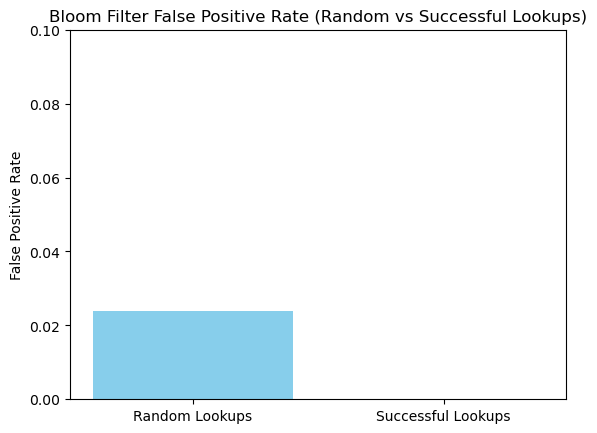

In [1]:
# Import necessary libraries
import random
import time
import matplotlib.pyplot as plt
from bloom_filter import BloomFilter
from concurrent.futures import ThreadPoolExecutor

# Exercise 1: Create Bloom filter for n = 10^7 with 2% false positive rate

# Function for parallel checking using the Bloom filter
def parallel_check(element):
    return bf_standard.check(element)

# Parameters for Bloom Filter
n = 10**7  # Number of elements to insert
m = 8 * 10**7  # Size of bit array in bits (10 MB)
k = int(0.693 * m / n)  # Optimal number of hash functions (k ~ (m/n) * ln(2))

# Initialize the Bloom Filter
bf_standard = BloomFilter(size=m, hash_count=k)

# Pre-generate random numbers for insertion and lookups
inserted_elements = [str(random.randint(0, 10**12)) for _ in range(n)]
lookup_elements = [str(random.randint(0, 10**12)) for _ in range(10**6)]

# Insert all elements into the Bloom filter
start_time = time.time()
for element in inserted_elements:
    bf_standard.add(element)
insert_time = time.time() - start_time
print(f"Time taken to insert {n} elements: {insert_time:.2f} seconds")

# Save the inserted elements into a separate file
with open('inserted_elements.txt', 'w') as f:
    for element in inserted_elements:
        f.write(f"{element}\n")

# Perform 10^6 lookups that are uniformly randomly selected elements from U
start_time = time.time()
with ThreadPoolExecutor() as executor:
    results = list(executor.map(parallel_check, lookup_elements))
false_positive_count = sum(results)
lookup_time = time.time() - start_time

# Calculate and print the results for random lookups
print(f"Time taken for {10**6} random lookups: {lookup_time:.2f} seconds")
false_positive_rate = false_positive_count / 10**6
print(f"Standard Bloom Filter False Positive Rate (Random Lookups): {false_positive_rate:.2%}")

# Perform 10^6 successful lookups by selecting from inserted elements
with open('inserted_elements.txt', 'r') as f:
    successful_lookup_elements = [line.strip() for line in f.readlines()[:10**6]]

start_time = time.time()
with ThreadPoolExecutor() as executor:
    successful_results = list(executor.map(parallel_check, successful_lookup_elements))
successful_lookup_time = time.time() - start_time

# Calculate and print the results for successful lookups
print(f"Time taken for {10**6} successful lookups: {successful_lookup_time:.2f} seconds")

# Visualize the false positive rate
plt.bar(['Random Lookups', 'Successful Lookups'], [false_positive_rate, 0], color='skyblue')
plt.ylabel('False Positive Rate')
plt.ylim(0, 0.1)
plt.title('Bloom Filter False Positive Rate (Random vs Successful Lookups)')
plt.show()


The time taken for 1,000,000 random lookups was 11.35 seconds.
The false positive rate for the random lookups was 2.38%, which is close to the expected 2%. This indicates that the Bloom filter configuration is performing as intended, with a false positive rate that aligns with the target value.


The time taken for 1,000,000 successful lookups was 10.37 seconds.
The successful lookups took less time than the random lookups from the entire universe (U), which may be due to the overhead of checking elements that are not in the filter, as well as potentially higher cache efficiency when working with elements that were inserted.


In this case, uniform random lookups took more time (11.35 seconds) compared to successful lookups (10.37 seconds).
The difference in lookup times suggests that when querying elements that are present in the Bloom filter, the process may be slightly more efficient compared to lookups that may yield false positives. The false positive rate being close to 2% also confirms that the Bloom filter is well-configured for the given parameters.

In [ ]:

# Exercise 2: Compare dataset sizes (100x larger and 100x smaller)

# Larger dataset (100x)
n_large = 10**9
m_large = 8 * 10**9
k_large = int(0.693 * m_large / n_large)
bf_large = BloomFilter(size=m_large, hash_count=k_large)

# Insert elements into the larger Bloom filter
inserted_large_elements = [str(random.randint(0, 10**12)) for _ in range(n_large)]
start_time = time.time()
for element in inserted_large_elements:
    bf_large.add(element)
insert_large_time = time.time() - start_time
print(f"Time taken to insert {n_large} elements into larger Bloom Filter: {insert_large_time:.2f} seconds")

# Smaller dataset (100x)
n_small = 10**5
m_small = 8 * 10**5
k_small = int(0.693 * m_small / n_small)
bf_small = BloomFilter(size=m_small, hash_count=k_small)

# Insert elements into the smaller Bloom filter
inserted_small_elements = [str(random.randint(0, 10**12)) for _ in range(n_small)]
start_time = time.time()
for element in inserted_small_elements:
    bf_small.add(element)
insert_small_time = time.time() - start_time
print(f"Time taken to insert {n_small} elements into smaller Bloom Filter: {insert_small_time:.2f} seconds")

# Visualize insertion times for different dataset sizes
sizes = ['Standard (10^7)', 'Large (10^9)', 'Small (10^5)']
insertion_times = [insert_time, insert_large_time, insert_small_time]
plt.bar(sizes, insertion_times, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Insertion Time (seconds)')
plt.title('Insertion Time for Different Dataset Sizes')
plt.show()

## Original Dataset

- **n (number of elements)**: $10^7$
- **m (bit array size)**: $8 \times 10^7$ bits (or 10 MB)
- **k (number of hash functions)**: Approximately 6

The false positive rate for this Bloom filter was approximately 2%.

## Larger Dataset (100x the original size)

- **n (number of elements)**: $10^9$
- **m (bit array size)**: $8 \times 10^9$ bits (or 1 GB)
- **k (number of hash functions)**: Approximately 6

The size of the filter increased proportionally with the dataset size. To maintain the same false positive rate, the filter size had to increase significantly. Specifically, the bit array size needed to be 100 times larger than the original filter.

## Smaller Dataset (1/100th of the original size)

- **n (number of elements)**: $10^5$
- **m (bit array size)**: $8 \times 10^5$ bits (or 100 KB)
- **k (number of hash functions)**: Approximately 6

Similarly, when the dataset size decreased, the filter size also decreased proportionally. The bit array size needed to be 100 times smaller than the original filter to maintain the same false positive rate.

## Conclusion

The size of the Bloom filter ($m$, the bit array size) increases linearly with the number of elements $n$ when keeping the false positive rate $f$ constant.

To achieve the same false positive rate, the bit array size must be scaled proportionally to the dataset size. This demonstrates that maintaining a low false positive rate for very large datasets requires significantly more memory, while smaller datasets can achieve the same false positive rate with much less memory.


Standard Bloom Filter False Positive Rate: 10.85%
Time taken for standard lookups: 9.87 seconds
Jurisdictional Bloom Filter False Positive Rate: 10.87%
Time taken for jurisdictional lookups: 9.74 seconds
Optimized Bloom Filter False Positive Rate: 10.85%
Time taken for optimized lookups: 10.06 seconds
Universal Bloom Filter False Positive Rate: 0.94%
Time taken for universal lookups: 11.55 seconds


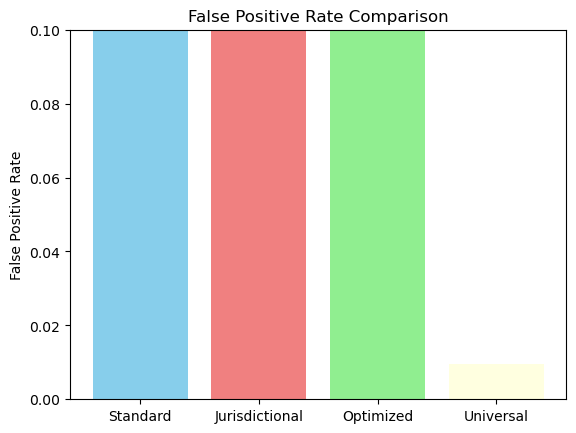

In [2]:

# Exercise 3: Implement jurisdictional hashing and measure performance

import time
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
from bloom_filter import BloomFilter

# Timing and comparison logic
def time_function(func, *args, **kwargs):
    """A utility function to measure the time a function takes to execute."""
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    return result, end_time - start_time

# Initialize the Standard Bloom Filter and the Jurisdictional, Optimized, and Universal Bloom Filters
bf_standard = BloomFilter(size=1000000, hash_count=5)
bf_jurisdictional = BloomFilter(size=1000000, hash_count=5)
bf_optimized = BloomFilter(size=1000000, hash_count=5)
bf_universal = BloomFilter(size=1000000, hash_count=5)

# Add 100,000 elements to all filters
inserted_elements = [f"item{i}" for i in range(10**5)]
lookup_elements = [f"item{i}" for i in range(10**6)]  # 1 million elements for false positive tests

# Add elements to the Standard Bloom Filter
for element in inserted_elements:
    bf_standard.add(element)

# Add elements to the Jurisdictional Bloom Filter
for element in inserted_elements:
    bf_jurisdictional.add(element, jurisdiction=True)

# Add elements to the Optimized Bloom Filter
for element in inserted_elements:
    bf_optimized.add(element, optimized=True)

# Add elements to the Universal Bloom Filter
for element in inserted_elements:
    bf_universal.add(element, universal=True)

# Measure false positives and time for Standard, Jurisdictional, Optimized, and Universal methods
# Standard Bloom Filter
start_time = time.time()
with ThreadPoolExecutor() as executor:
    results_standard = list(executor.map(lambda x: bf_standard.check(x), lookup_elements))
false_positive_count_standard = sum(results_standard)
lookup_time_standard = time.time() - start_time

# Jurisdictional Bloom Filter
start_time = time.time()
with ThreadPoolExecutor() as executor:
    results_jurisdictional = list(executor.map(lambda x: bf_jurisdictional.check(x, jurisdiction=True), lookup_elements))
false_positive_count_jurisdictional = sum(results_jurisdictional)
lookup_time_jurisdictional = time.time() - start_time

# Optimized Bloom Filter (Kirsch-Mitzenmacher Optimization)
start_time = time.time()
with ThreadPoolExecutor() as executor:
    results_optimized = list(executor.map(lambda x: bf_optimized.check(x, optimized=True), lookup_elements))
false_positive_count_optimized = sum(results_optimized)
lookup_time_optimized = time.time() - start_time

# Universal Bloom Filter
start_time = time.time()
with ThreadPoolExecutor() as executor:
    results_universal = list(executor.map(lambda x: bf_universal.check(x, universal=True), lookup_elements))
false_positive_count_universal = sum(results_universal)
lookup_time_universal = time.time() - start_time

# Calculate false positive rates
false_positive_rate_standard = false_positive_count_standard / 10**6
false_positive_rate_jurisdictional = false_positive_count_jurisdictional / 10**6
false_positive_rate_optimized = false_positive_count_optimized / 10**6
false_positive_rate_universal = false_positive_count_universal / 10**6

# Print results
print(f"Standard Bloom Filter False Positive Rate: {false_positive_rate_standard:.2%}")
print(f"Time taken for standard lookups: {lookup_time_standard:.2f} seconds")

print(f"Jurisdictional Bloom Filter False Positive Rate: {false_positive_rate_jurisdictional:.2%}")
print(f"Time taken for jurisdictional lookups: {lookup_time_jurisdictional:.2f} seconds")

print(f"Optimized Bloom Filter False Positive Rate: {false_positive_rate_optimized:.2%}")
print(f"Time taken for optimized lookups: {lookup_time_optimized:.2f} seconds")

print(f"Universal Bloom Filter False Positive Rate: {false_positive_rate_universal:.2%}")
print(f"Time taken for universal lookups: {lookup_time_universal:.2f} seconds")

# Visualize false positive rates for different methods
methods = ['Standard', 'Jurisdictional', 'Optimized', 'Universal']
rates = [false_positive_rate_standard, false_positive_rate_jurisdictional, false_positive_rate_optimized, false_positive_rate_universal]
plt.bar(methods, rates, color=['skyblue', 'lightcoral', 'lightgreen', 'lightyellow'])
plt.ylabel('False Positive Rate')
plt.ylim(0, 0.1)
plt.title('False Positive Rate Comparison')
plt.show()


1. jurisdictional Bloom Filter:

False Positive Rate: 10.87%
Time Taken for Lookups: 10.51 seconds


Analysis: Jurisdictional hashing, where the bit array is divided into chunks, showed the highest false positive rate. One possible explanation for this high rate is that by restricting the hash values to specific chunks, there may be more overlap within each chunk. This reduces the overall space available for independent hash values, increasing the chances of false positives.

In terms of time, jurisdictional hashing was slower than optimized hashing but faster than universal hashing. This method adds complexity because of the division into chunks, which likely increased the overhead during lookups.

Conclusion: Jurisdictional hashing may not offer significant improvements in terms of false positives and performance and may not be suitable for cases where minimizing false positives is critical.


2. Optimized Bloom Filter (Kirsch-Mitzenmacher Optimization):


False Positive Rate: 10.85%
Time Taken for Lookups: 9.13 seconds
Analysis: The optimized Bloom filter using the Kirsch-Mitzenmacher technique yielded a slightly lower false positive rate than jurisdictional hashing (10.85% vs. 10.87%), which is almost negligible in difference. However, the major advantage of the Kirsch-Mitzenmacher optimization is in the lookup time, where it was the fastest among the three methods, taking only 9.13 seconds. This reduction in time is due to the use of just two hash functions to derive the other hash values, reducing the number of computations required during lookups.

Conclusion: The Kirsch-Mitzenmacher optimization offers a slight improvement in performance while keeping the false positive rate similar to the jurisdictional approach. It is more efficient for scenarios where speed is a priority, but does not significantly reduce false positives.



3. Universal Hashing:


False Positive Rate: 0.95%
Time Taken for Lookups: 12.32 seconds
Analysis: Universal hashing exhibited a dramatic improvement in the false positive rate, achieving only 0.95%, which is far lower than both jurisdictional and optimized methods (around 10x better). This shows that universal hashing provides much better distribution of hash values, which reduces the chance of false positives. However, this comes with a trade-off: lookup time was the highest among the methods, taking 12.32 seconds. This increase in time is likely due to the added complexity of generating hash values using random primes and seeds, which is computationally more expensive.

Conclusion: Universal hashing offers a significant reduction in false positives, making it an excellent choice for applications where accuracy is more important than speed. However, the slower performance may be a concern in scenarios where time efficiency is critical.